# Task 5: Strategy Backtesting

## Objective
Validate the optimized portfolio strategy against a standard benchmark.
- **Strategy:** 100% SPY (as recommended in Task 4).
- **Benchmark:** 60% SPY / 40% BND (Standard Balanced Portfolio).
- **Period:** January 2025 - January 2026 (Out-of-sample data).

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join('..')))
from src.backtester import calculate_portfolio_returns, calculate_cumulative_returns, get_backtest_metrics

plt.style.use('seaborn-v0_8')

In [2]:
# Load historical prices
df = pd.read_csv('../data/processed/cleaned_adj_close.csv', index_col='Date', parse_dates=True)

# Define backtesting window (Last year of data)
backtest_start = "2025-01-01"
backtest_data = df[df.index >= backtest_start]

# Calculate daily returns
returns = backtest_data.pct_change().dropna()

print(f"Backtesting from {returns.index[0].date()} to {returns.index[-1].date()}")

Backtesting from 2025-01-03 to 2026-01-14


In [3]:
# Define Weights
strategy_weights = {"TSLA": 0.0, "BND": 0.0, "SPY": 1.0}
benchmark_weights = {"TSLA": 0.0, "BND": 0.4, "SPY": 0.6}

# Calculate Daily Returns
strat_daily = calculate_portfolio_returns(returns, strategy_weights)
bench_daily = calculate_portfolio_returns(returns, benchmark_weights)

# Calculate Cumulative Returns
strat_cum = calculate_cumulative_returns(strat_daily)
bench_cum = calculate_cumulative_returns(bench_daily)

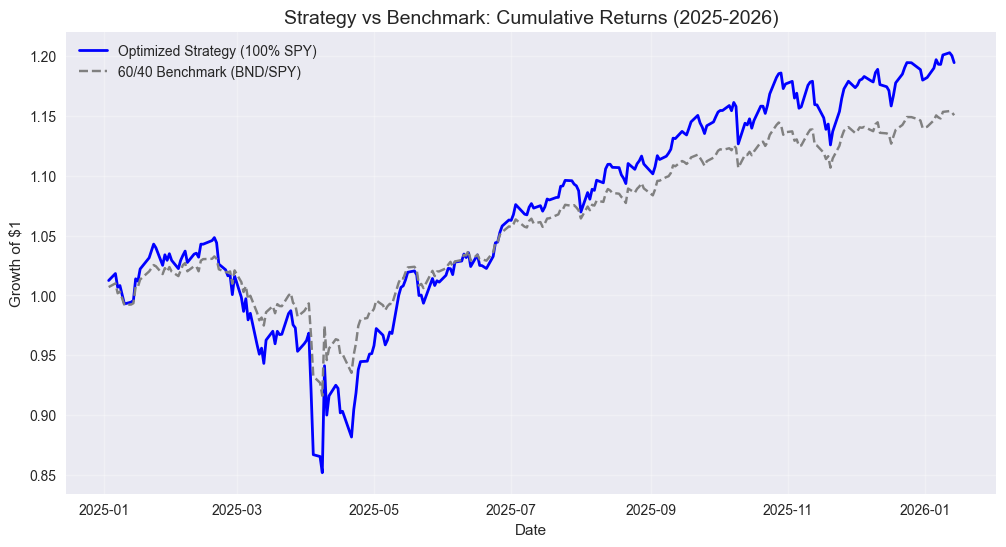

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(strat_cum, label='Optimized Strategy (100% SPY)', color='blue', linewidth=2)
plt.plot(bench_cum, label='60/40 Benchmark (BND/SPY)', color='gray', linestyle='--')

plt.title('Strategy vs Benchmark: Cumulative Returns (2025-2026)', fontsize=14)
plt.ylabel('Growth of $1')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [5]:
strat_metrics = get_backtest_metrics(strat_daily)
bench_metrics = get_backtest_metrics(bench_daily)

metrics_df = pd.DataFrame([strat_metrics, bench_metrics], index=['Strategy', 'Benchmark']).T
display(metrics_df)

,Strategy,Benchmark
Total Return,19.47%,15.07%
Annualized Return,18.98%,14.70%
Sharpe Ratio,0.88,1.07
Max Drawdown,-18.76%,-11.29%
